In [1]:
import json

In [2]:
with open('/Users/ewenwang/Documents/practice_data/graph/crem_graphdb_es_20180307.json', 'r') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['status', 'data', 'statistics'])

In [4]:
data['data']['edges'][0]

{'eid': 13840969029793087491,
 'label': 'BACKUP2',
 'properties': [{'cino_source_name': 'ZJ^HemXiP8GLXht$!XDJdA$'},
  {'cino_target_name': 'au5Mhp%Kkov&x^qP2A4(uGo'},
  {'data_source': 'wQu)6ScP1xUKDf^+POA43&s'},
  {'data_date': '20180525'},
  {'p_date': 'pKUEqwMWDp4n*1iw*wq5NzV'},
  {'main_rela': 'CALCULATED'}],
 'source_id': '26',
 'source_label': '1',
 'target_id': '23',
 'target_label': '1'}

In [5]:
source_id = []
target_id = []

for edge in data['data']['edges']:
    source_id.append(edge['source_id'])
    target_id.append(edge['target_id'])

In [6]:
import pandas as pd

df = pd.DataFrame({'source': source_id, 'target': target_id})

In [7]:
df.head()

,source,target
0,26,23
1,26,21
2,26,31
3,26,31
4,26,39


In [8]:
edgelist = [*zip(source_id, target_id)]

In [9]:
edgelist[0]

('26', '23')

In [10]:
import networkx as nx

In [11]:
G = nx.Graph()

In [12]:
G.add_edges_from(edgelist)

In [13]:
len(G.nodes())

48

In [14]:
import matplotlib.pyplot as plt
nx.draw_spring(G, node_size=20)

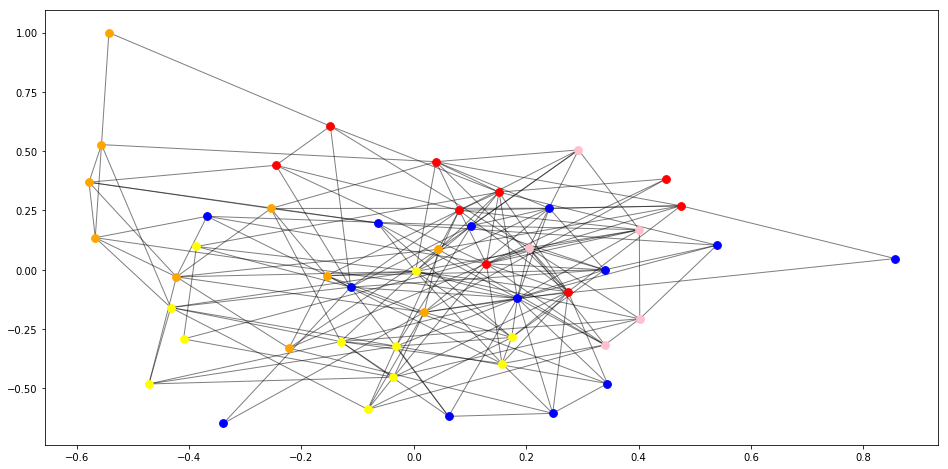

In [16]:
import community

partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

plt.figure(figsize=(16, 8))
color = ['red', 'blue', 'yellow', 'orange', 'pink']
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 60,
                           node_color = color[com])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [17]:
node_lists = []
for ccomp in set(partition.values()):
    node_list = [nodes for nodes in partition.keys() if partition[nodes] == ccomp]
    node_lists.append(node_list)
    print('num of ', ccomp, len(node_list))

num of  0 9
num of  1 13
num of  2 11
num of  3 10
num of  4 5


In [18]:
sub_egde_list = []

for i in [*G.edges().keys()]:
    if i[0] in node_lists[1] and i[1] in node_lists[1]:
        sub_egde_list.append(i)

In [21]:
sub_egde_list

[('23', '16'),
 ('23', '38'),
 ('23', '12'),
 ('23', '29'),
 ('34', '41'),
 ('34', '43'),
 ('34', '38'),
 ('34', '16'),
 ('34', '48'),
 ('34', '29'),
 ('34', '46'),
 ('34', '36'),
 ('34', '7'),
 ('43', '36'),
 ('43', '38'),
 ('41', '46'),
 ('41', '16'),
 ('38', '49'),
 ('38', '16'),
 ('38', '12'),
 ('38', '7'),
 ('16', '29'),
 ('36', '7')]

In [25]:
sub_graph = nx.Graph()
sub_graph.add_edges_from(sub_egde_list)

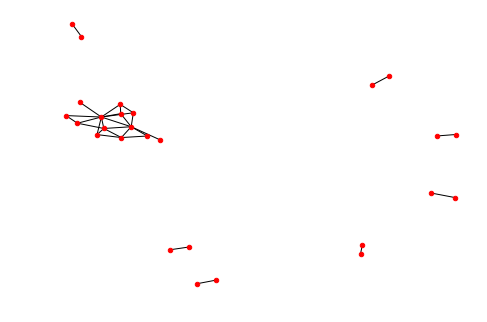

In [27]:
nx.draw_spring(sub_graph, node_size=20)

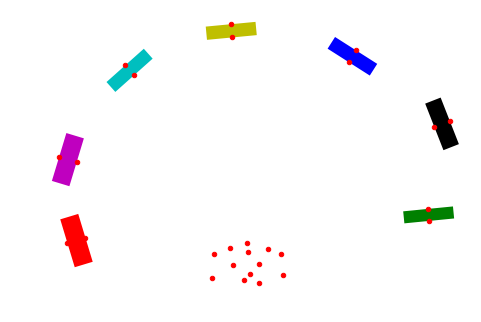

In [26]:
for color in "bgrcmyk":
    sub_graph.add_edge('s'+color,'t'+color, color=color)
edges,colors = zip(*nx.get_edge_attributes(sub_graph,'color').items())
nx.draw(sub_graph,edgelist=edges,edge_color=colors,width=50, node_size=20)